<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/Porter_NN_CaseStudy_Mariya_DSML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case Study - Porter Dataset

### Objective
#### Porter wants to get an estimated delivery time that it can provide to the customers on the basis of what they are ordering, from where and based on the delivery partners. 

In [1]:
# Import required libraries
# Usual libraries for data manipulation
# ****************************************************
import datetime as dt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Libraries for data visualization
# ****************************************************
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 

# Warnings handler
# ****************************************************
import warnings
warnings.filterwarnings('ignore')

# Libraries for Pre-processing
# ****************************************************
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Libraries for Models
# ****************************************************
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [2]:
from google.colab import files
uploaded = files.upload()

Saving porter_dataset.csv to porter_dataset.csv


In [4]:
# Load the data
data_df = pd.read_csv('/content/porter_dataset.csv')

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
# Shape of the dataset
print("Given dataset contains {0} Rows and {1} Columns".format(data_df.shape[0], data_df.shape[1]))

Given dataset contains 197428 Rows and 14 Columns


In [ ]:
# Check for Count & Percentage of missing values in each column
missing_values = data_df.isna().sum().to_frame().sort_values(0, ascending=False).rename(columns={0:'Missing Values in the Dataset'})
missing_values['%'] = (missing_values['Missing Values in the Dataset']/len(data_df))*100
missing_values

Missing Values in the Dataset         %
total_onshift_partners                            16262  8.236927
total_busy_partners                               16262  8.236927
total_outstanding_orders                          16262  8.236927
store_primary_category                             4760  2.411006
order_protocol                                      995  0.503981
market_id                                           987  0.499929
actual_delivery_time                                  7  0.003546
created_at                                            0  0.000000
store_id                                              0  0.000000
total_items                                           0  0.000000
subtotal                                              0  0.000000
num_distinct_items                                    0  0.000000
min_item_price                                        0  0.000000
max_item_price                                        0  0.000000

In [ ]:
data_df.duplicated().sum()

0

In [ ]:
data_df.head()


market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0

### Data Pre-processing and Cleaning

In [5]:
data_df['store_primary_category'] = data_df['store_primary_category'].fillna("Not Specified")

In [ ]:
print("Number of Primary Store Categories: ", data_df['store_primary_category'].nunique())
data_df['store_primary_category'].unique()

Number of Primary Store Categories:  75


array(['american', 'mexican', 'Not Specified', 'indian', 'italian',
       'sandwich', 'thai', 'cafe', 'salad', 'pizza', 'chinese',
       'singaporean', 'burger', 'breakfast', 'mediterranean', 'japanese',
       'greek', 'catering', 'filipino', 'convenience-store', 'other',
       'korean', 'vegan', 'asian', 'barbecue', 'fast', 'dessert',
       'smoothie', 'seafood', 'vietnamese', 'cajun', 'steak',
       'middle-eastern', 'soup', 'vegetarian', 'persian', 'nepalese',
       'sushi', 'latin-american', 'hawaiian', 'chocolate', 'burmese',
       'british', 'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish',
       'malaysian', 'ethiopian', 'afghan', 'bubble-tea', 'german',
       'french', 'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=obje

In [6]:
# Create a feature 'delivery time' to calculate the time taken for delivery
data_df['delivery_time'] = (pd.to_datetime(data_df['actual_delivery_time']) - pd.to_datetime(data_df['created_at'])).dt.total_seconds()

In [7]:
# Calculate hour of order creation 
data_df['created_at'] = pd.to_datetime(data_df['created_at']).dt.hour

In [8]:
# Convert the datatype of few columns to category type
data_df['market_id'] = data_df['market_id'].astype('category')
data_df['store_id'] = data_df['store_id'].astype('category')
data_df['store_primary_category'] = data_df['store_primary_category'].astype('category')
data_df['order_protocol'] = data_df['order_protocol'].astype('category')

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 196441 non-null  category
 1   created_at                197428 non-null  int64   
 2   actual_delivery_time      197421 non-null  object  
 3   store_id                  197428 non-null  category
 4   store_primary_category    197428 non-null  category
 5   order_protocol            196433 non-null  category
 6   total_items               197428 non-null  int64   
 7   subtotal                  197428 non-null  int64   
 8   num_distinct_items        197428 non-null  int64   
 9   min_item_price            197428 non-null  int64   
 10  max_item_price            197428 non-null  int64   
 11  total_onshift_partners    181166 non-null  float64 
 12  total_busy_partners       181166 non-null  float64 
 13  total_outstanding_orders  181

In [9]:
data_df = data_df.drop(['store_id'], axis=1)

### Exploratory Data Analysis (EDA)

In [ ]:
data = data_df.sort_values(by='created_at', ascending=True)
data['created_at'].value_counts()

2     36976
1     28190
3     27068
20    15560
4     15250
19    13541
0     12669
21    11465
22     8821
23     8163
5      7096
18     5100
17     3413
16     2109
6      1416
15      538
14       40
7        11
8         2
Name: created_at, dtype: int64

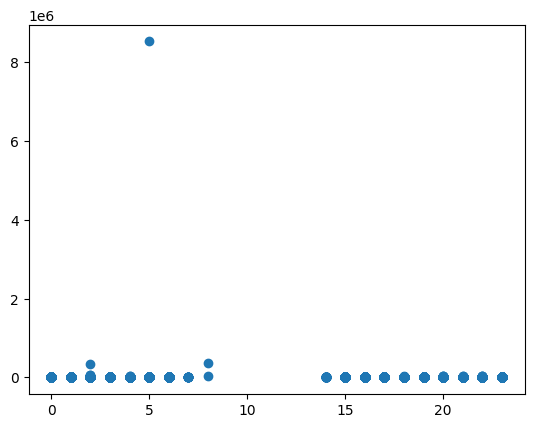

In [ ]:
plt.scatter(data['created_at'], data['delivery_time'])
plt.show()

In [10]:
# Create a working copy of the dataset for analysis
work_df = data_df.copy()

## Univariate Analysis

#### Graphical Analysis of Continuous Variables

In [ ]:
# Create helper method to display histograms
def plot_num_variables(data, var: str):
  title = str(" Distribution of " + var + " ")
  title = title.center(150, '*')
  print('\n', title)
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
  sns.histplot(data, x=var, ax=axes[0])
  sns.kdeplot(data, x=var, ax=axes[1])
  sns.boxplot(data, x=var, ax=axes[2])
  plt.tight_layout()
  plt.show()


 ************************************************************* Distribution of created_at *************************************************************


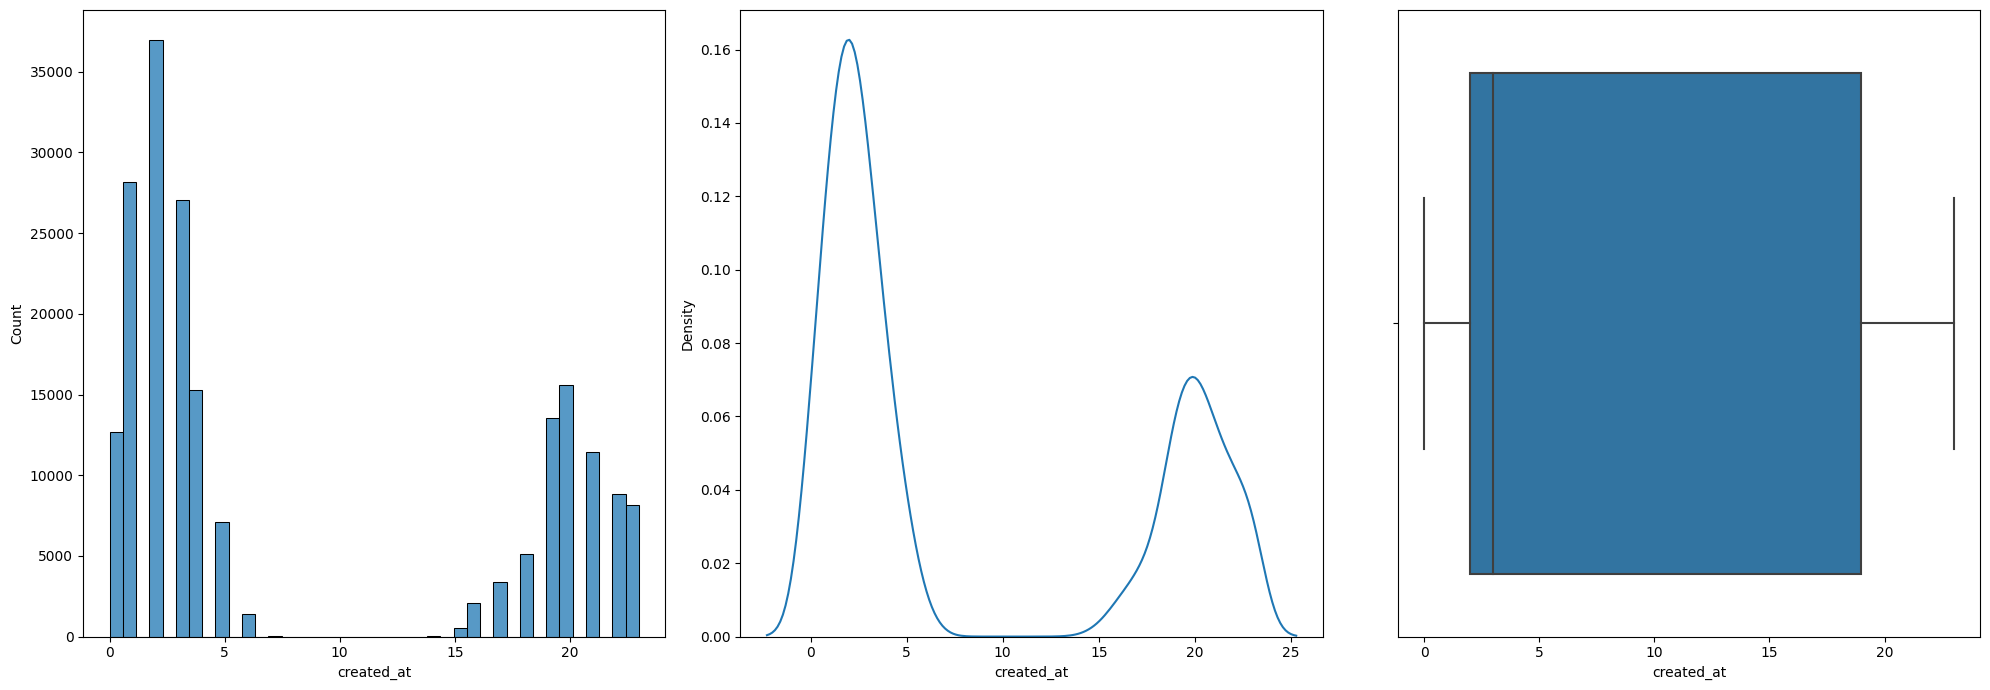


 ************************************************************ Distribution of total_items *************************************************************


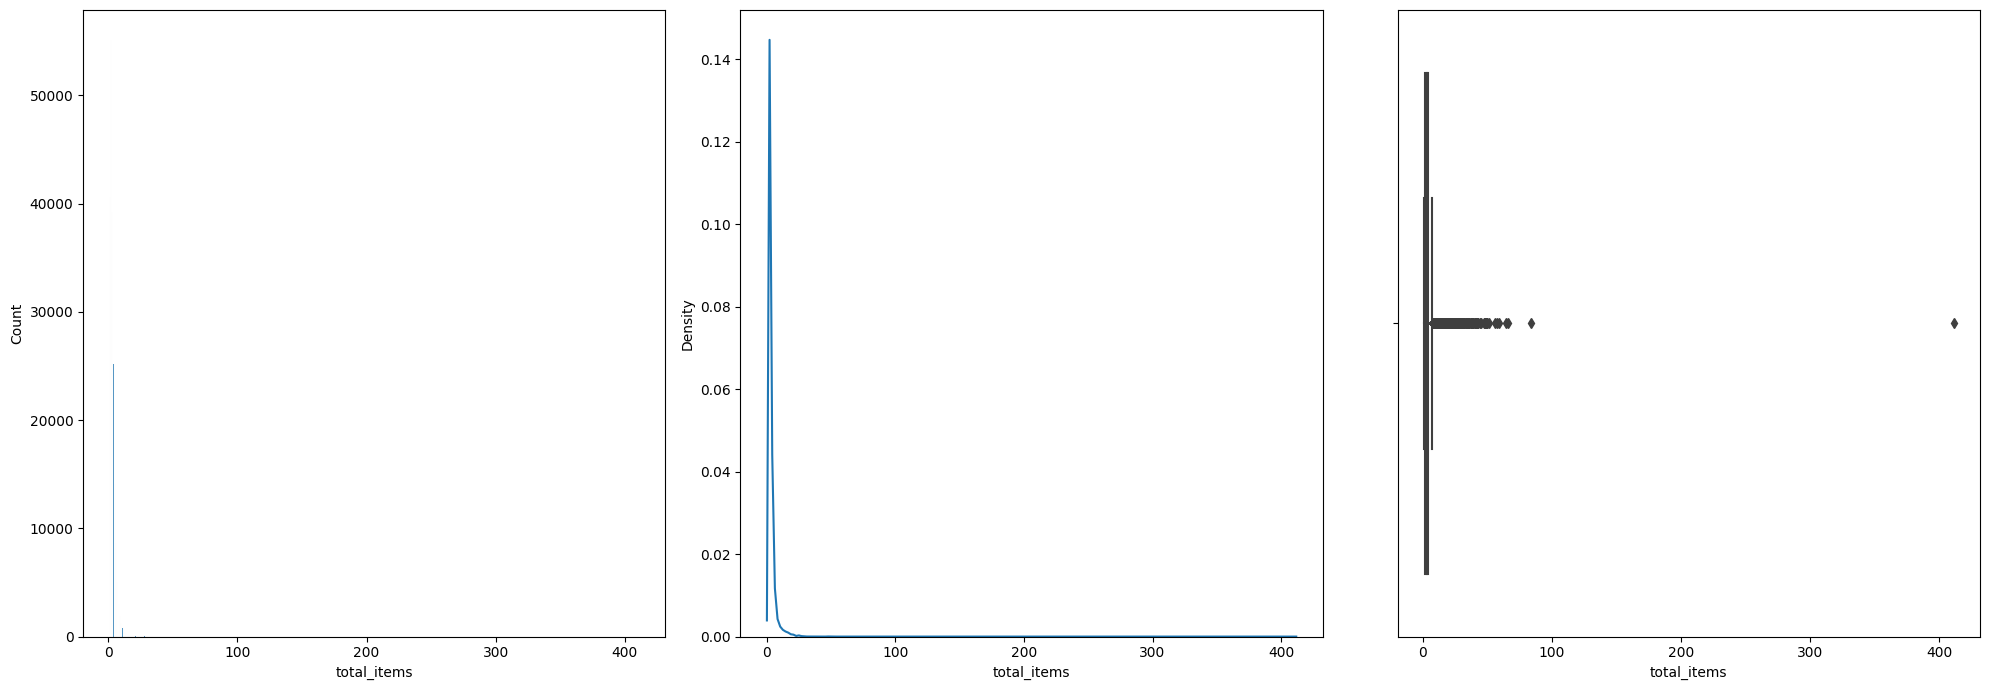


 ************************************************************** Distribution of subtotal **************************************************************


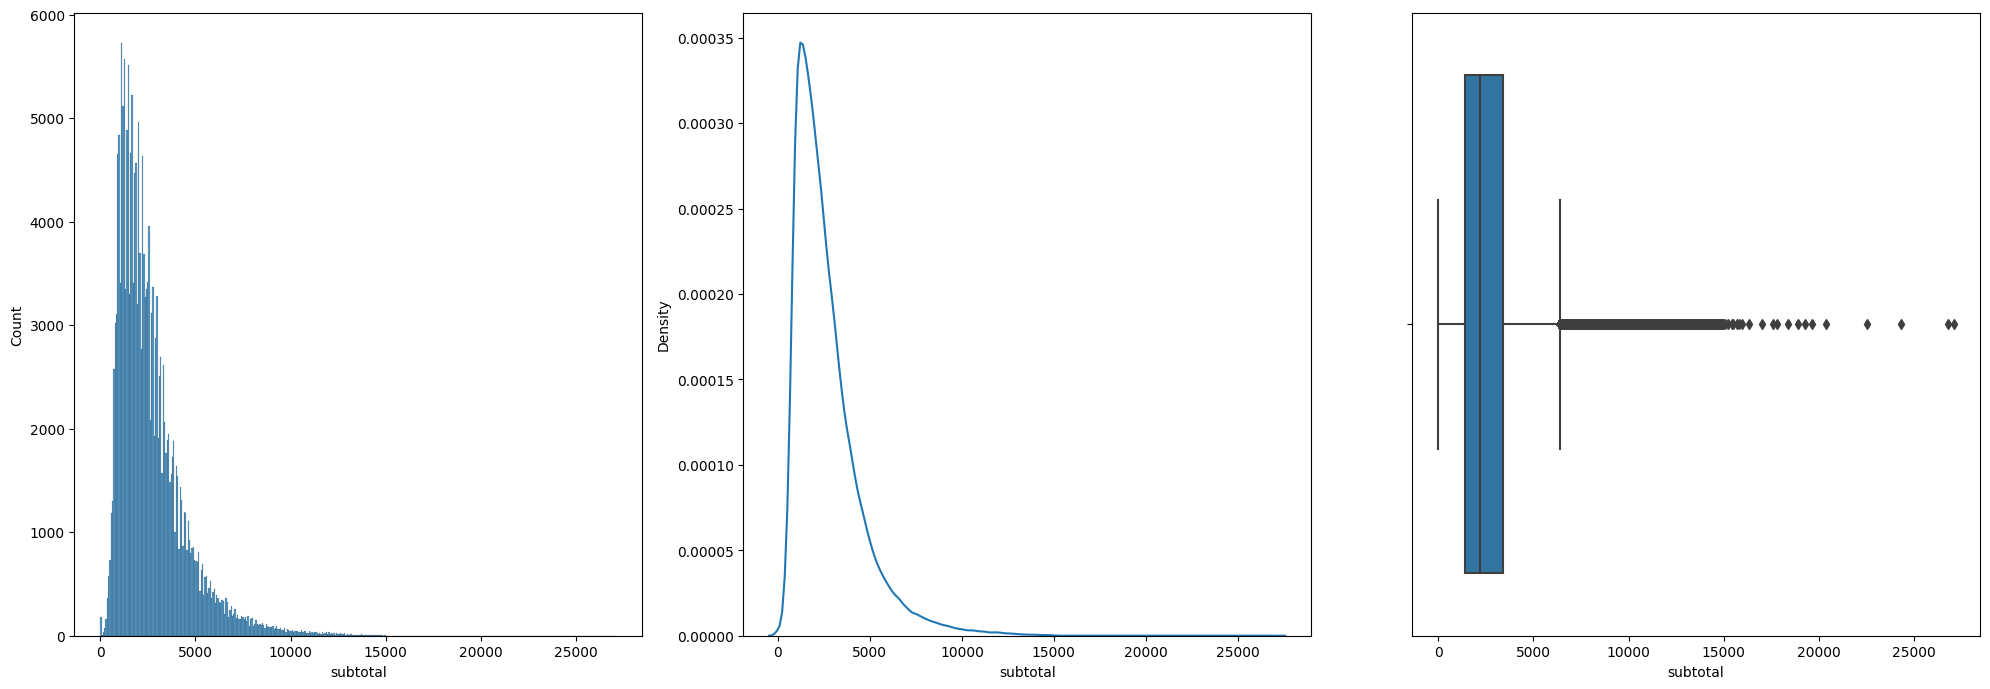


 ********************************************************* Distribution of num_distinct_items *********************************************************


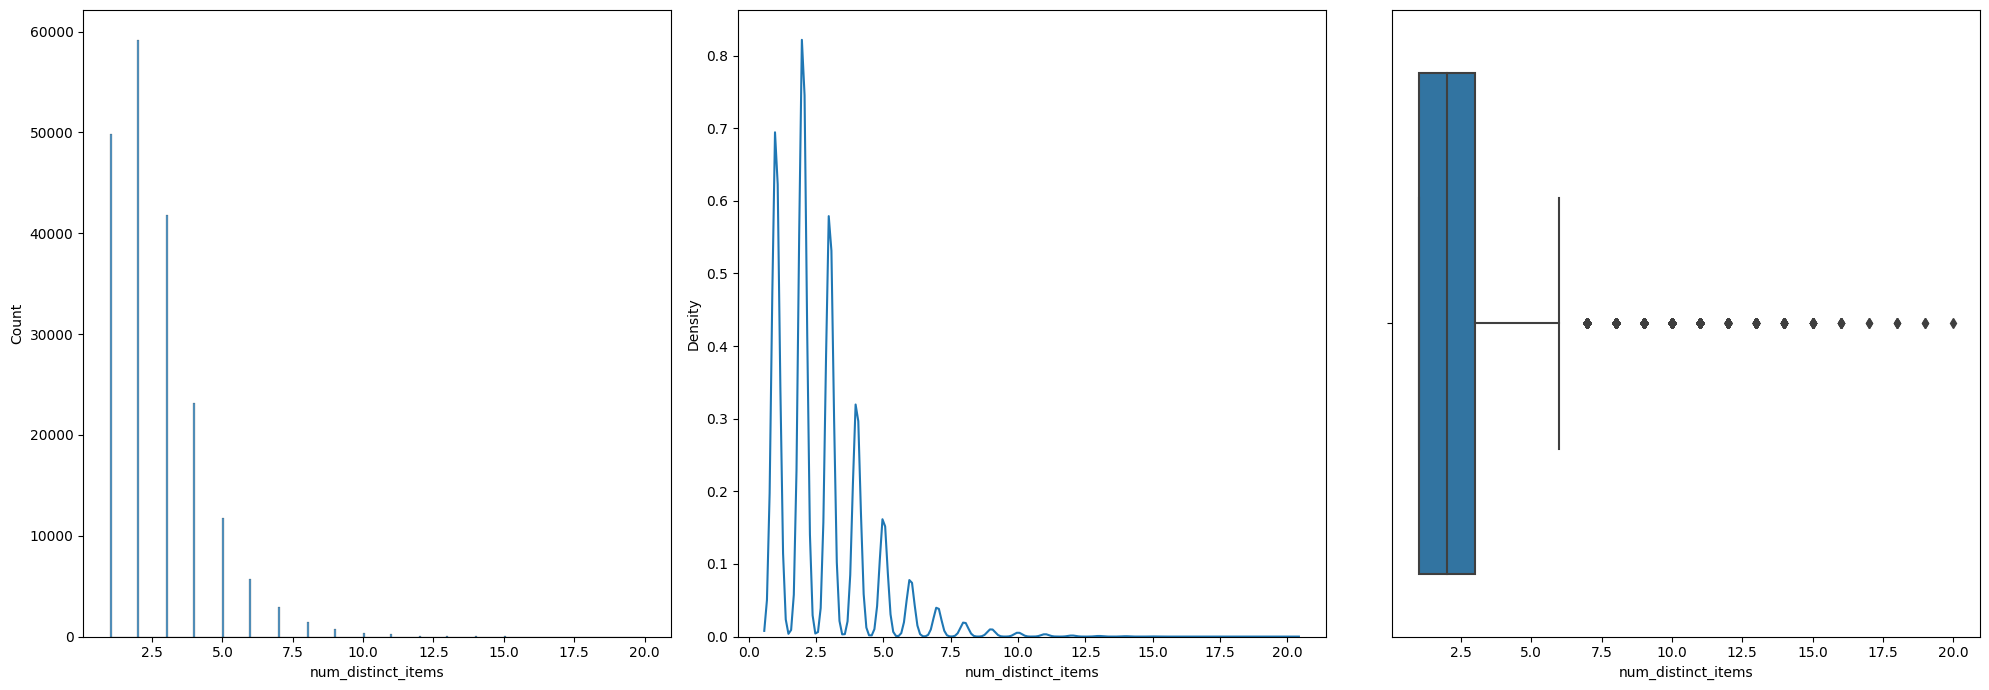


 *********************************************************** Distribution of min_item_price ***********************************************************


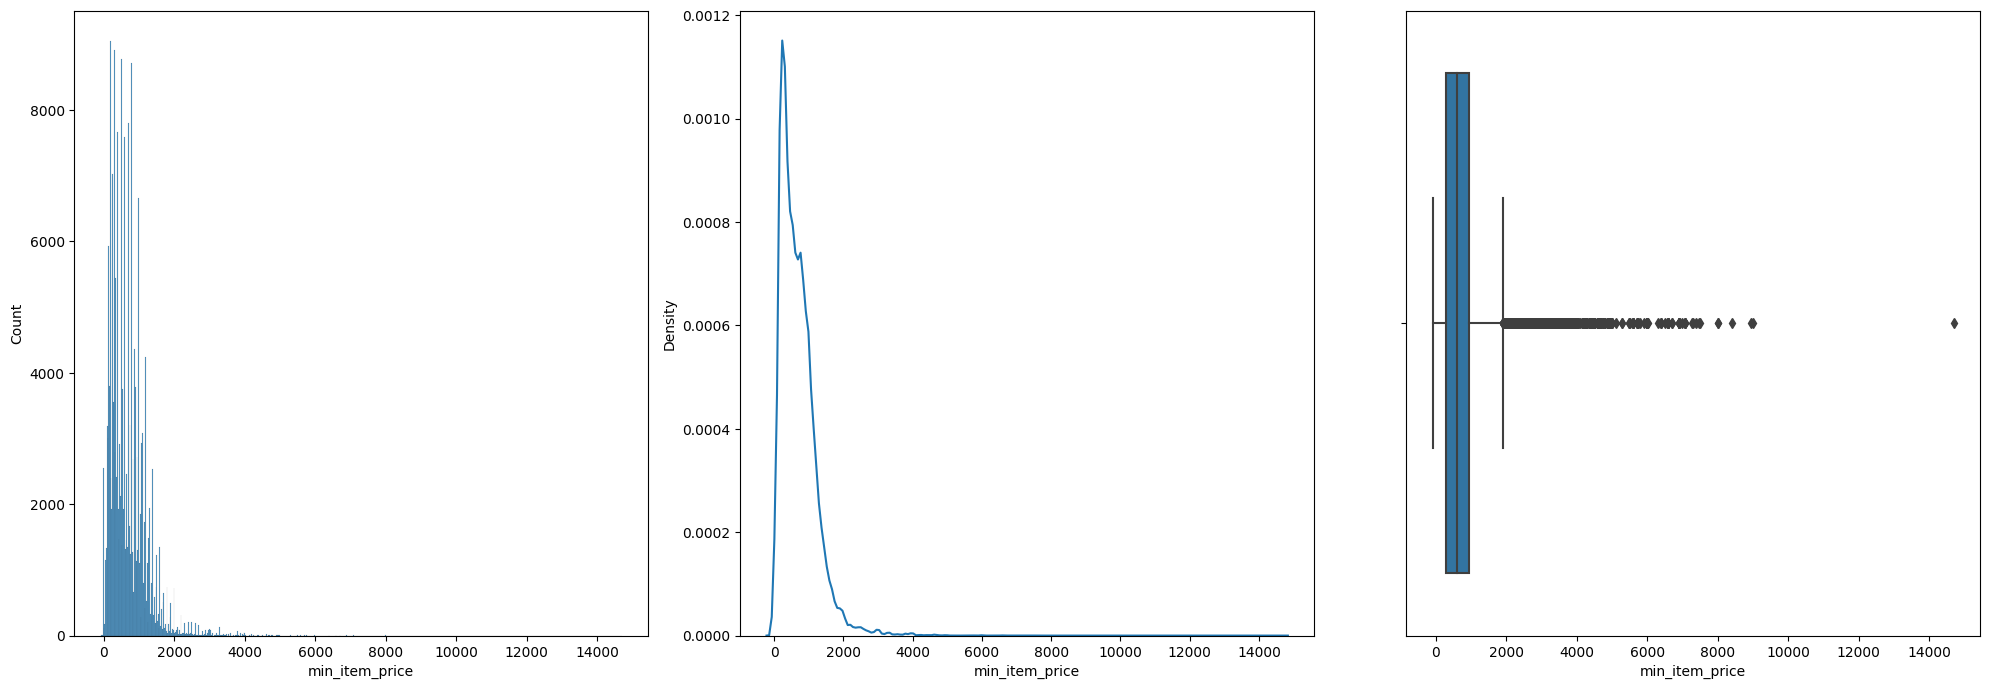


 *********************************************************** Distribution of max_item_price ***********************************************************


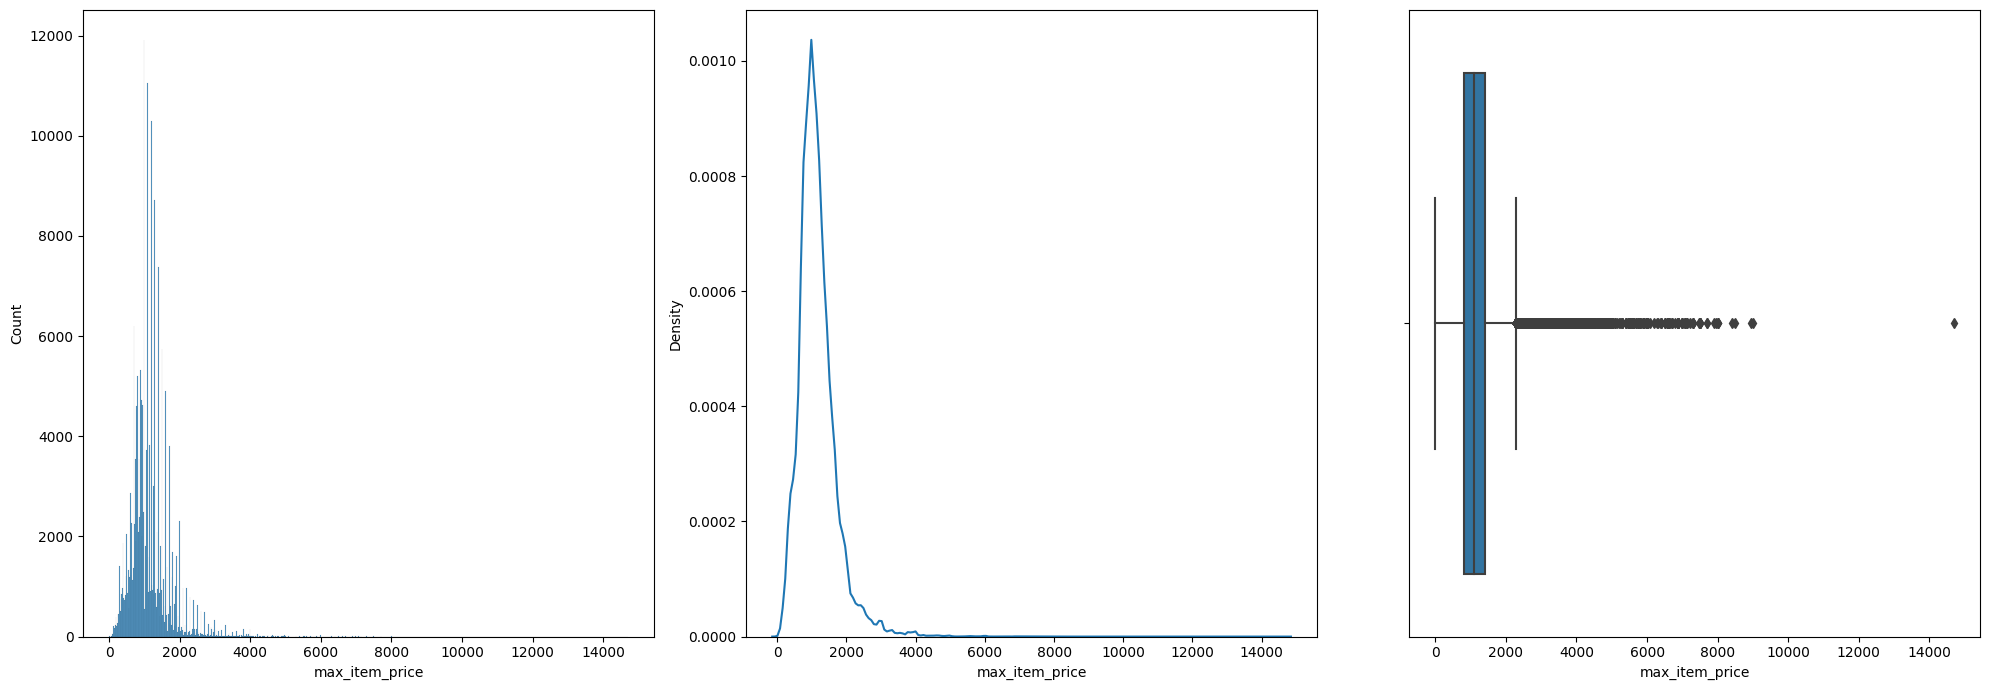


 ******************************************************* Distribution of total_onshift_partners *******************************************************


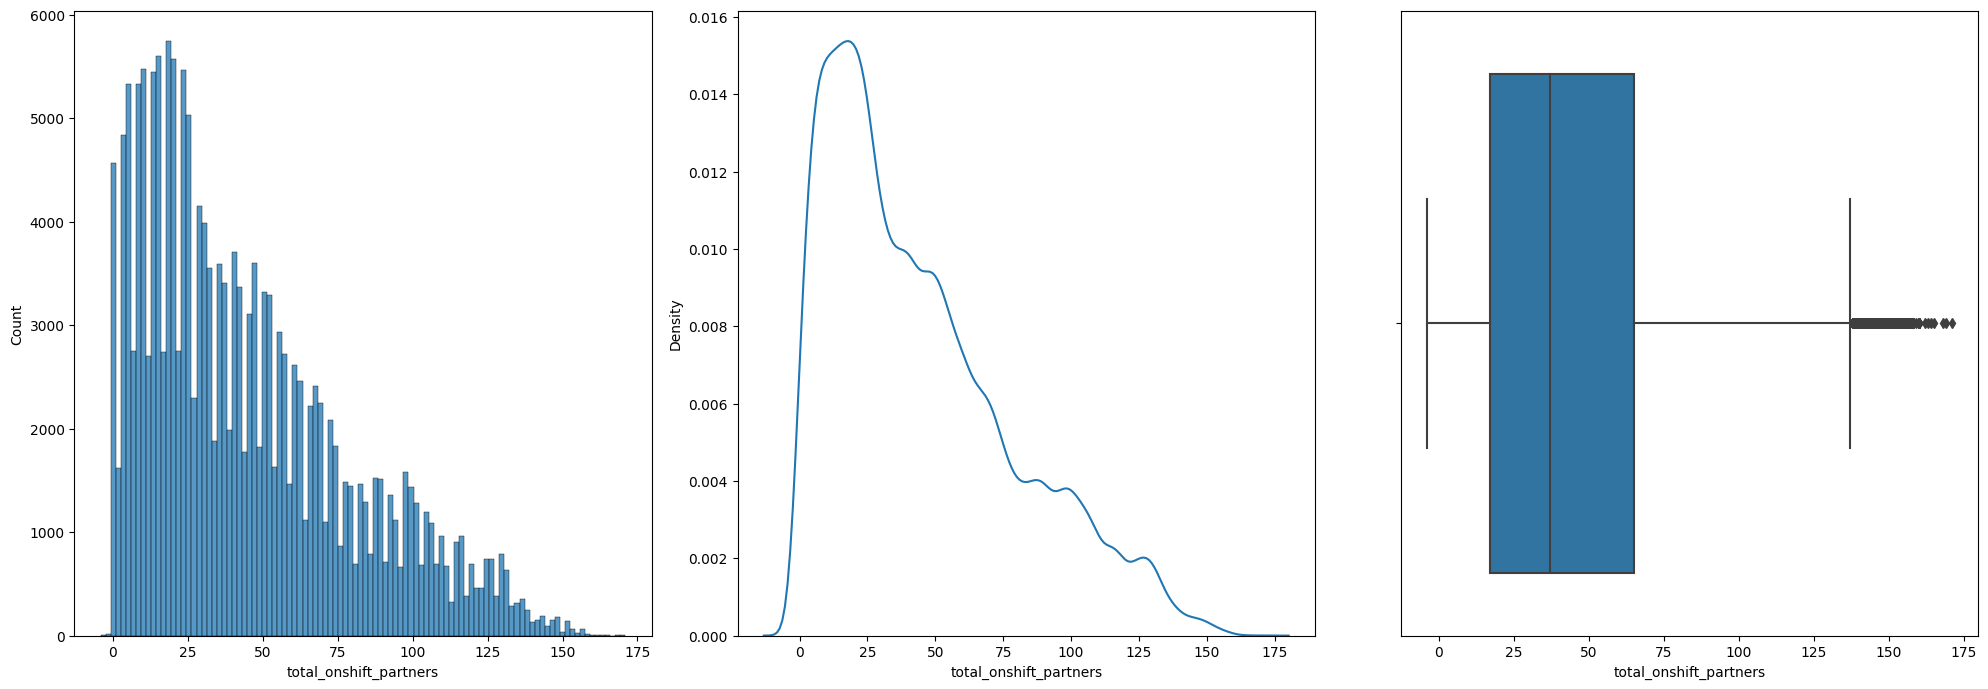


 ******************************************************** Distribution of total_busy_partners *********************************************************


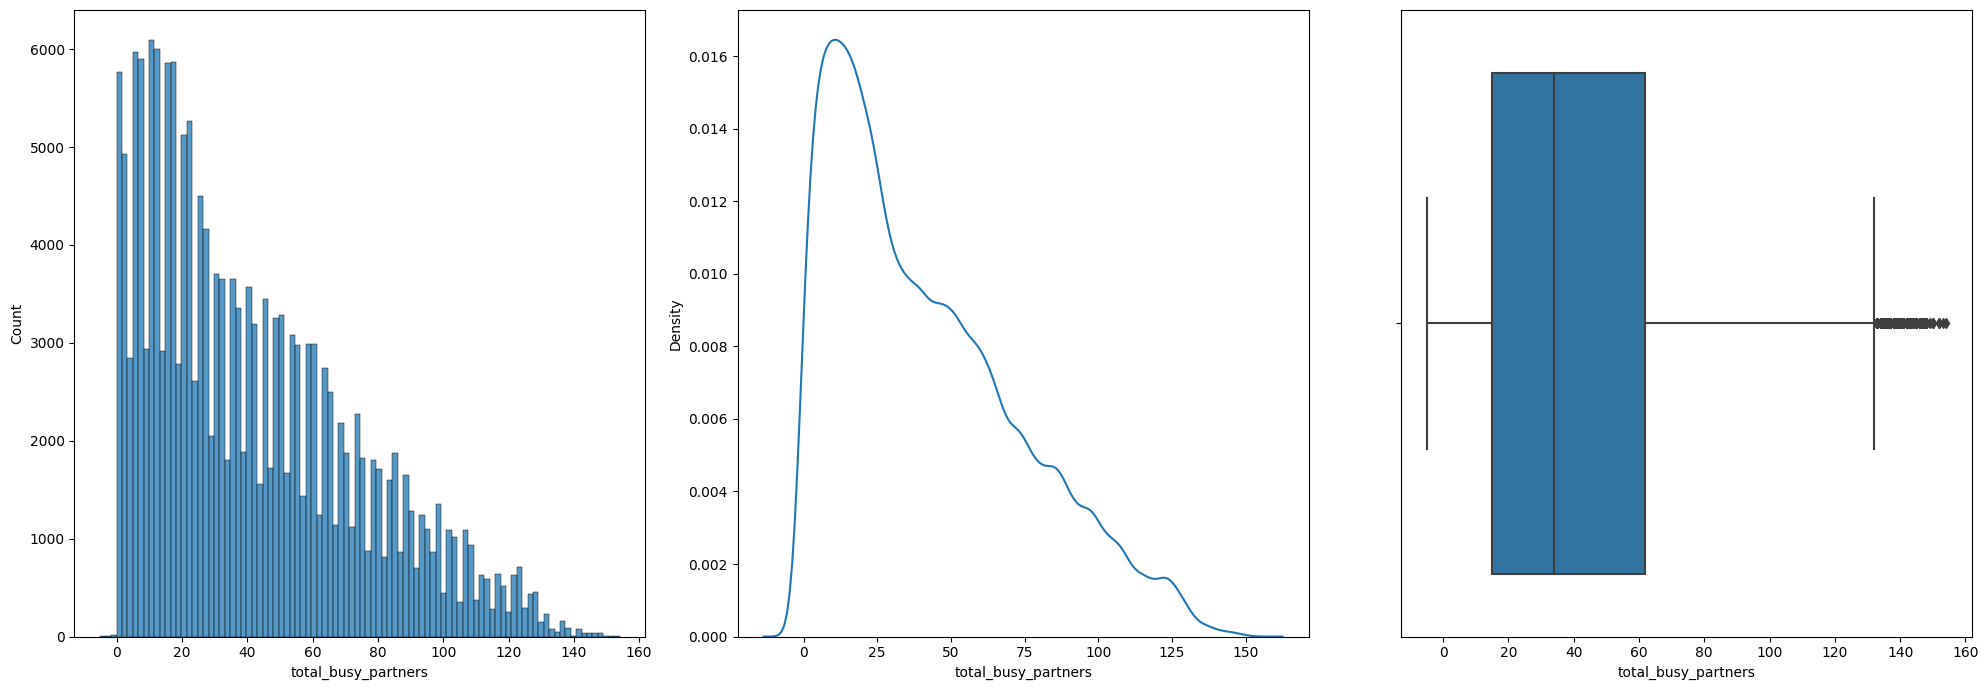


 ****************************************************** Distribution of total_outstanding_orders ******************************************************


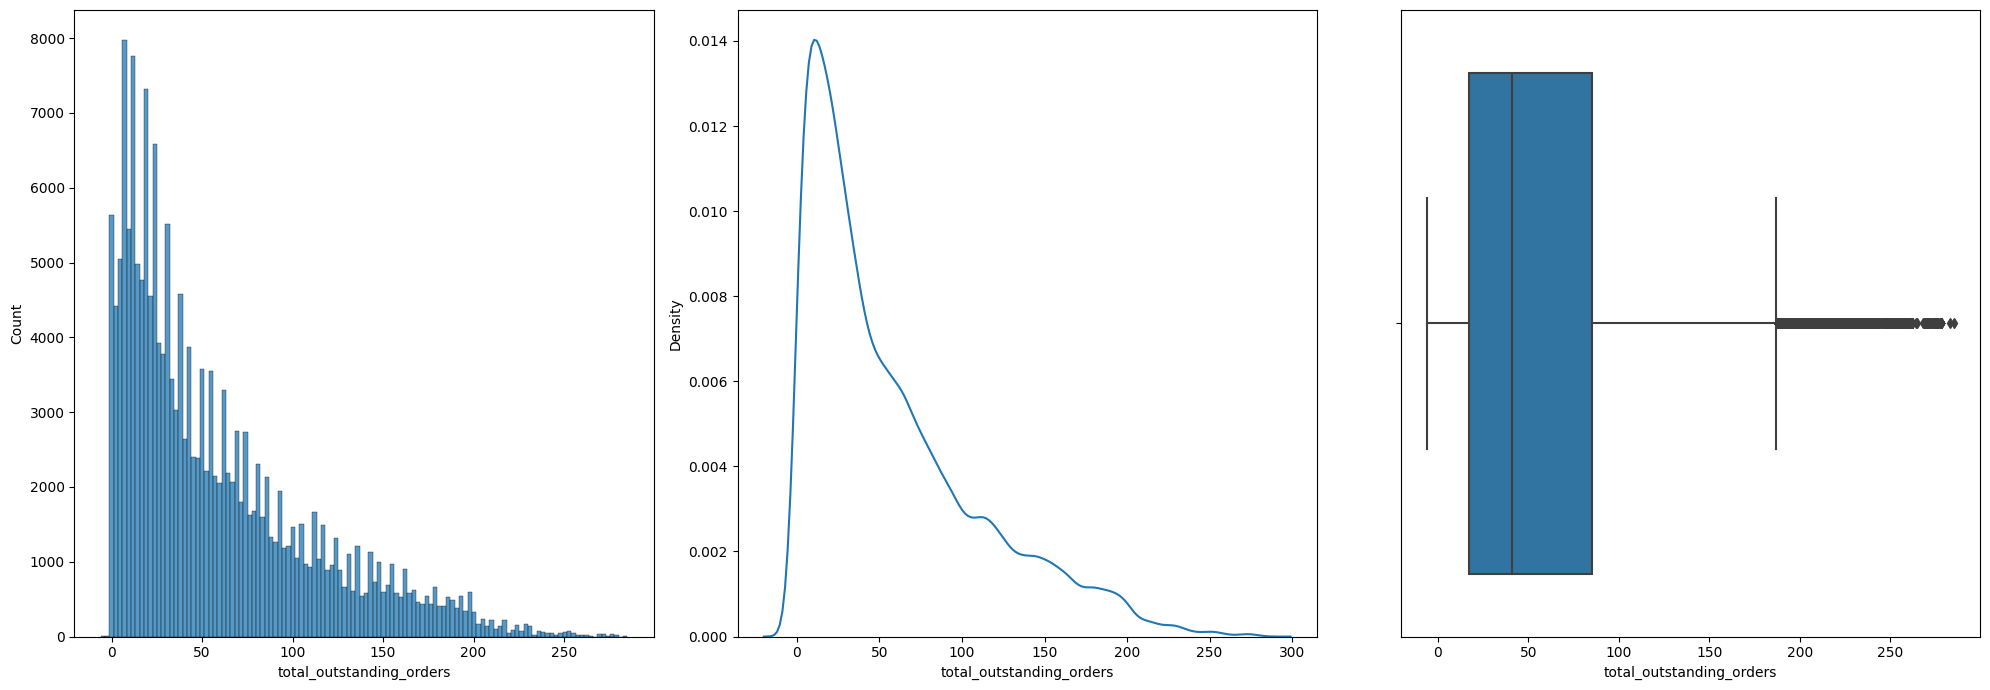


 *********************************************************** Distribution of delivery_time ************************************************************


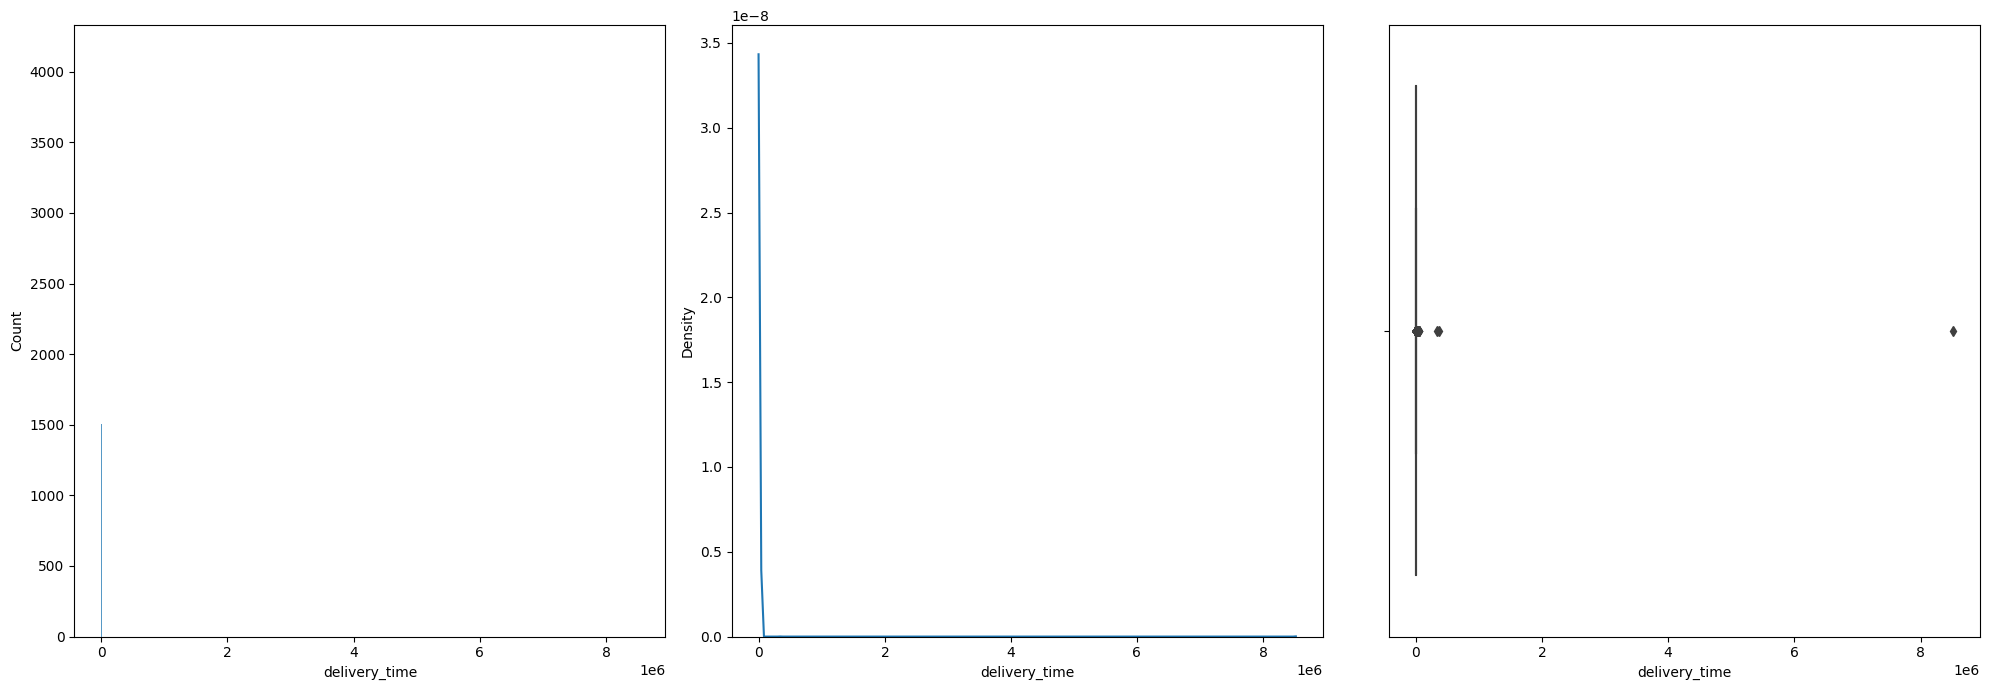

In [ ]:
num_columns = work_df.select_dtypes('number')
for col in num_columns:
  plot_num_variables(work_df, col)

#### Graphical Analysis of Categorical Variables

In [ ]:
# Create helper method to display bar plots
def plot_cat_variables(data, var: str):
  title = str(" Distribution of " + var + " ")
  fig, ax = plt.subplots(figsize=(10, 5))
  sns.countplot(data, x=var, ax=ax)
  ax.set_title(title)
  print()
  plt.show()

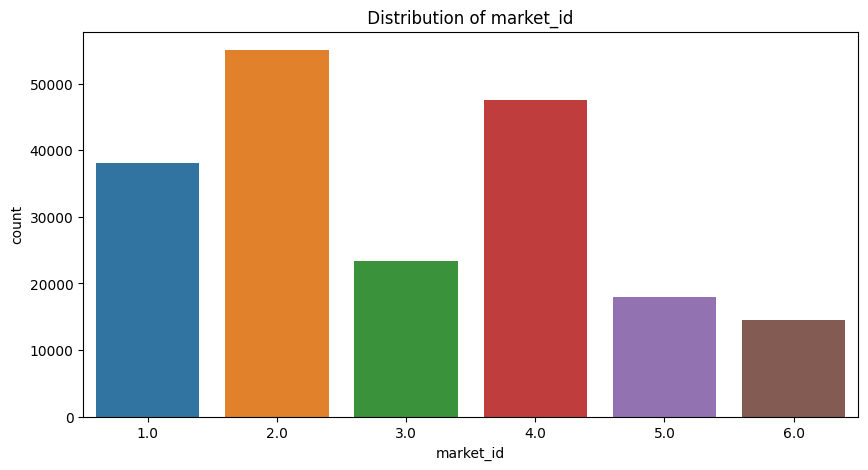

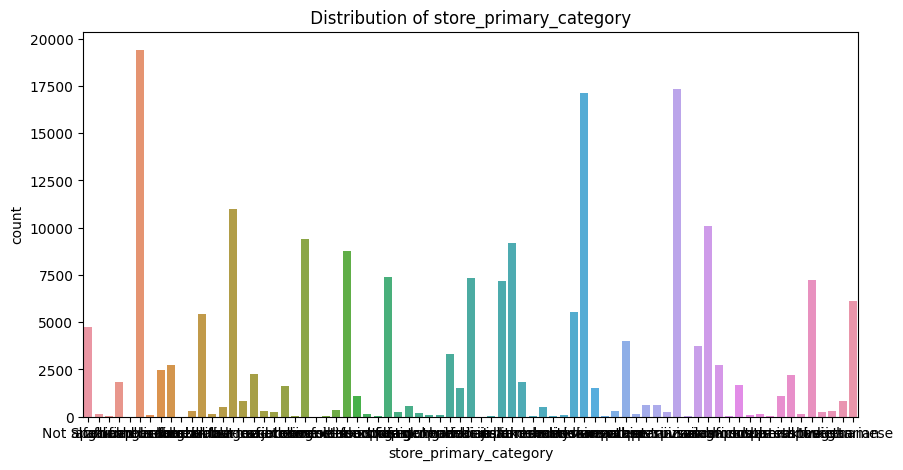

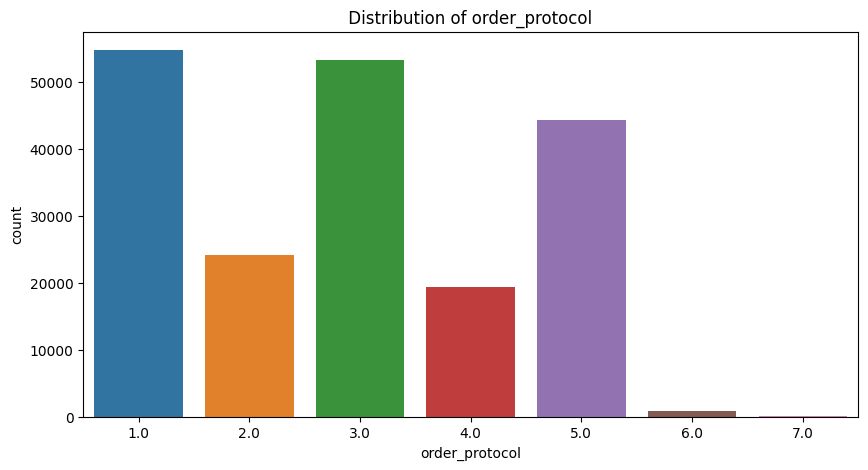

In [ ]:
cat_columns = work_df.select_dtypes('category')
for col in cat_columns:
  plot_cat_variables(work_df, col)

In [12]:
work_df['time_at'] = work_df['created_at']
orders_per_hour = work_df[['time_at']].value_counts().to_frame().reset_index()
orders_per_hour = orders_per_hour.rename(columns={0:'count'})
orders_per_hour = orders_per_hour.sort_values('time_at')
orders_per_hour = orders_per_hour.reset_index(drop=True)

fig = px.scatter(orders_per_hour, x='time_at', y='count', hover_data=['time_at', 'count'], color='count')
fig.update_layout(title='Orders Per Hour', 
                  xaxis=dict(tickmode='linear', tick0=0, dtick=1), title_x=0.5)
fig.show()

In [ ]:
# Max Orders and the time of the Order
max_cnt = orders_per_hour['count'].max()
max_time = orders_per_hour.loc[orders_per_hour['count']==max_cnt, 'time_at'].iloc[0]
print(f"The maximum order quantity is given at time {max_time} with {max_cnt} orders")

The maximum order quantity is given at time 2 with 36976 orders


In [ ]:
# Average number of items per order
print(f"Average # of items per order is: {round(work_df['total_items'].mean(),2)}")

Average # of items per order is: 3.2


In [ ]:
# Average spend by people per order
print(f"Average spend by people {round(work_df['subtotal'].mean(),2)} per order")

Average spend by people 2682.33 per order


## Bivariate Analysis

In [ ]:
# Top 10 stores with highest subtotal/money
store_wise_money = work_df.groupby('store_primary_category')['subtotal'].sum().to_frame().reset_index()
store_wise_money = store_wise_money.sort_values('subtotal', ascending=False)
store_wise_money = store_wise_money.head(10)
store_wise_money = store_wise_money.reset_index(drop=True)
store_wise_money

store_primary_category  subtotal
0                  pizza  52092237
1               american  51572367
2                mexican  39251042
3               japanese  30905690
4                chinese  27021933
5                italian  26874120
6                 burger  24277803
7                   thai  22455499
8                dessert  21381785
9                 indian  21264973

In [ ]:
fig = px.bar(store_wise_money, x='subtotal', y='store_primary_category', hover_data=['subtotal', 'store_primary_category'], color='subtotal', text_auto=True)
fig.update_layout(title="Top 10 Most Popular Stores", 
                  width=800, title_x=0.5)
fig.show()

In [14]:
# Number of on shift Partners
num_of_partners = work_df.groupby('time_at')['total_onshift_partners'].sum().to_frame()
fig = px.scatter(num_of_partners, y='total_onshift_partners', hover_data=['total_onshift_partners'], color='total_onshift_partners')

fig.update_layout(title='# of on shift Partners', title_x=0.5)
fig.update_layout(xaxis=dict(tickmode='linear', tick0=0, dtick=1))

fig.show()

In [16]:
# Number of Busy Partners
num_of_busy_partners = work_df.groupby('time_at')['total_busy_partners'].sum().to_frame()
fig = px.scatter(num_of_busy_partners, y='total_busy_partners', hover_data=['total_busy_partners'], color='total_busy_partners')

fig.update_layout(title='# of Busy Partners', title_x=0.5)
fig.update_layout(xaxis=dict(tickmode='linear', tick0=0, dtick=1))

fig.show()

In [17]:
# Number of Pending Orders
pending_orders = work_df.groupby('time_at')['total_outstanding_orders'].sum().to_frame()
fig = px.scatter(pending_orders, y='total_outstanding_orders', hover_data=['total_outstanding_orders'], color='total_outstanding_orders')

fig.update_layout(title='# of Pending Orders', title_x=0.5)
fig.update_layout(xaxis=dict(tickmode='linear', tick0=0, dtick=1))

fig.show()

### Multivariate Analysis

In [20]:
fig = px.line(num_of_partners, y='total_onshift_partners', title='Availability Vs Time', hover_data=['total_onshift_partners'], color_discrete_sequence=['red'])
fig.add_trace(px.line(num_of_busy_partners, y='total_busy_partners', color_discrete_sequence=['green']).data[0])
fig.add_trace(px.line(pending_orders, y='total_outstanding_orders', color_discrete_sequence=['blue']).data[0])
fig.update_layout(title_x=0.5)
fig.update_yaxes(title_text='Number of Partners')
fig.show()

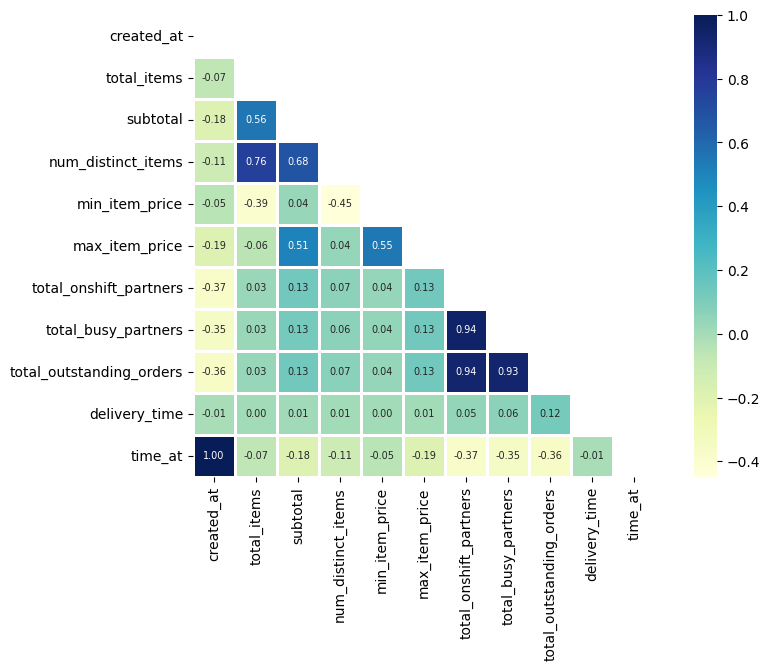

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
corr_matrix = work_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(corr_matrix, 
                 square=True,
                 linewidth=1,
                 annot=True,
                 linecolor='white',
                 cmap='YlGnBu',
                 annot_kws={'size':7},
                 fmt='.2f',
                 mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.show()